<center><h1>Sun_Kaiyi_HW5</h1></center>
<br>
<br>

Name: Kaiyi Sun
<br>
Github Username: KaiyiSss
<br>
USC ID: 6511379529

## 1. Decision Trees as Interpretable Models

Import packages

In [45]:
import pandas as pd
import numpy as np
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer 
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

### (a) Obtain Data

Get the Accute Inamations Data Set

In [46]:
diagnosis_column_names = ['Temperature of patient', 'Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains',
                'Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']

In [47]:
with open("../data/diagnosis.data", 'r', encoding="utf8", errors='ignore') as file:
  lines = file.readlines()

diagnosis_data = []
for l in lines:
  l_clean = l.replace('\x00', '')
  l_clean = l_clean.replace(',','.')
  l_clean = l_clean.replace('\t', ';')
  l_clean = l_clean.replace('\n', '')
  l_clean = l_clean.replace('no', '0')
  l_clean = l_clean.replace('yes', '1')
  l_clean = l_clean.split(';')
  if l_clean != ['']:
    l_clean = np.array(l_clean).astype(float)
    diagnosis_data.append(l_clean)

diagnosis_table = pd.DataFrame(diagnosis_data, columns=diagnosis_column_names)
diagnosis_table.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### (b) Build a decision tree

In [48]:
diagnosis_x, diagnosis_y = diagnosis_table.iloc[:, :-2], diagnosis_table.iloc[:, -2:]
diagnosis_features_column_names = diagnosis_column_names[:-2]

In [49]:
tree_model = LabelPowerset(classifier= tree.DecisionTreeClassifier(random_state=98))
tree_model.fit(diagnosis_x, diagnosis_y)

LabelPowerset(classifier=DecisionTreeClassifier(random_state=98),
              require_dense=[True, True])

[Text(0.4, 0.9, 'Lumbar pain <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(0.6, 0.7, 'Temperature of patient <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.7, 0.5, 'Occurrence of nausea <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

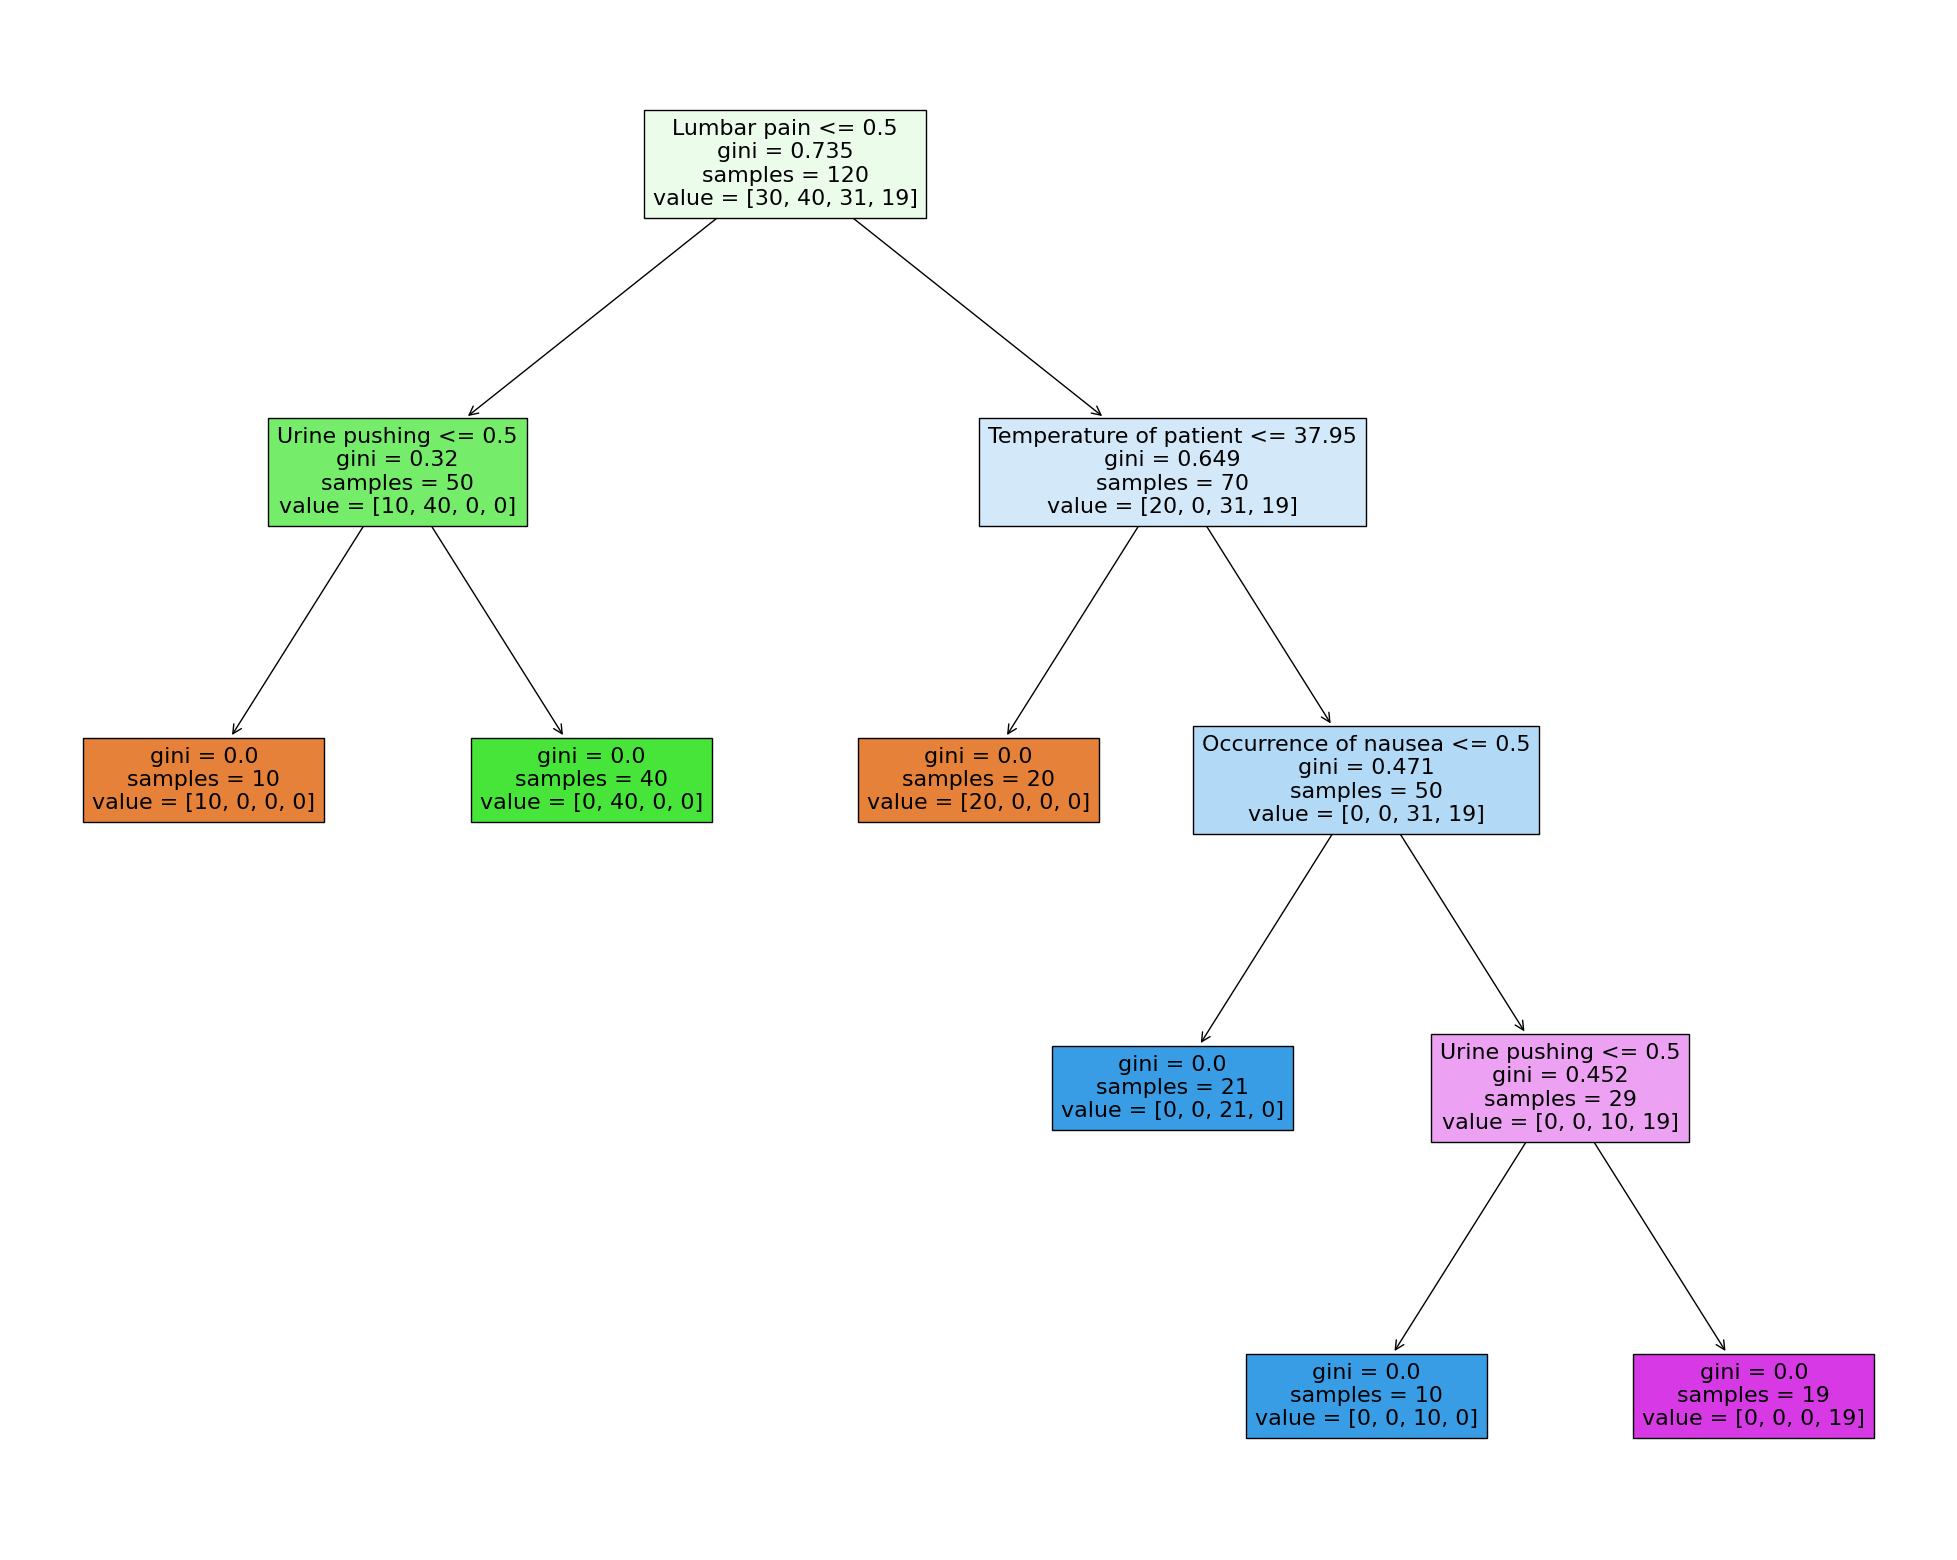

In [50]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_model.classifier, feature_names=diagnosis_features_column_names, filled=True, label='all')

### (c) Convert the decision rules

In [51]:
def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)

In [52]:
tree_to_pseudo(tree_model.classifier, diagnosis_features_column_names)

 if ( Lumbar pain <= 0.5 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[10.  0.  0.  0.]]
   } else {
     return [[ 0. 40.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[ 0.  0. 21.  0.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[ 0.  0. 10.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


### (d) Cost-Complexity Pruning with CV

In [53]:
# Prune tree with CCP
path = tree_model.classifier.cost_complexity_pruning_path(diagnosis_x, diagnosis_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [54]:
ccp_results = {'Alpha': ccp_alphas, 'Mean Score':[], 'STD Score':[]}
for alpha in ccp_alphas:
   ccp_model = LabelPowerset(classifier= tree.DecisionTreeClassifier(ccp_alpha=alpha, random_state=98))
   ccp_scores = cross_val_score(ccp_model.classifier, diagnosis_x, diagnosis_y, cv=5)
   ccp_results['Mean Score'].append(ccp_scores.mean())
   ccp_results['STD Score'].append(ccp_scores.std())
   
ccp_table = pd.DataFrame(ccp_results)
ccp_table

,Alpha,Mean Score,STD Score
0,0.000000,0.950000,0.100000
1,0.049083,0.741667,0.247768
2,0.079472,0.708333,0.260875
3,0.111111,0.566667,0.140929
4,0.204236,0.200000,0.209828


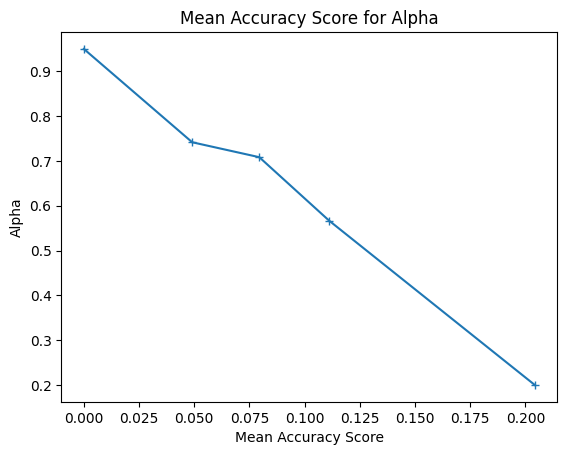

In [55]:
plt.plot(ccp_table['Alpha'], ccp_table['Mean Score'], marker='+')
plt.title('Mean Accuracy Score for Alpha')
plt.xlabel('Mean Accuracy Score')
plt.ylabel('Alpha')
plt.show()

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [56]:
communities_column_names = ["state","county","community","communityname",
                            "fold","population","householdsize","racepctblack",
                            "racePctWhite","racePctAsian","racePctHisp",
                            "agePct12t21","agePct12t29","agePct16t24","agePct65up",
                            "numbUrban","pctUrban","medIncome","pctWWage",
                            "pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst",
                            "pctWRetire","medFamInc","perCapInc","whitePerCap",
                            "blackPerCap","indianPerCap","AsianPerCap","OtherPerCap",
                            "HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade",
                            "PctNotHSGrad","PctBSorMore","PctUnemployed",
                            "PctEmploy","PctEmplManu","PctEmplProfServ",
                            "PctOccupManu","PctOccupMgmtProf","MalePctDivorce",
                            "MalePctNevMarr","FemalePctDiv","TotalPctDiv",
                            "PersPerFam","PctFam2Par","PctKids2Par",
                            "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids",
                            "PctWorkMom","NumIlleg","PctIlleg","NumImmig",
                            "PctImmigRecent","PctImmigRec5","PctImmigRec8",
                            "PctImmigRec10","PctRecentImmig","PctRecImmig5",
                            "PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam",
                            "PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous",
                            "PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR",
                            "MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded",
                            "PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb",
                            "OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian",
                            "RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc",
                            "MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn",
                            "PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85",
                            "LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop",
                            "LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop",
                            "RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp",
                            "PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz",
                            "PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars",
                            "PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy",
                            "LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

In [57]:
communities_data_table = pd.read_csv("../data/communities.csv", names=communities_column_names, na_values='?')
communities_data_table.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [58]:
# Splitting data into train and test
communities_train, communities_test = communities_data_table.iloc[:1495,:], communities_data_table.iloc[1495:,:]

### (b) Missing values

In [59]:
community_predictive_columns = communities_column_names[5:]
community_predictive_table = communities_data_table[community_predictive_columns]

In [60]:
imp_mean  = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean_data = imp_mean.fit_transform(community_predictive_table)

In [61]:
communities_data_table[communities_data_table.columns[5:]] = imp_mean_data
communities_data_table.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [62]:
communities_train, communities_test = communities_data_table.iloc[:1495, 5:], communities_data_table.iloc[1495:, 5:]

### (c) Plot a correlation matrix

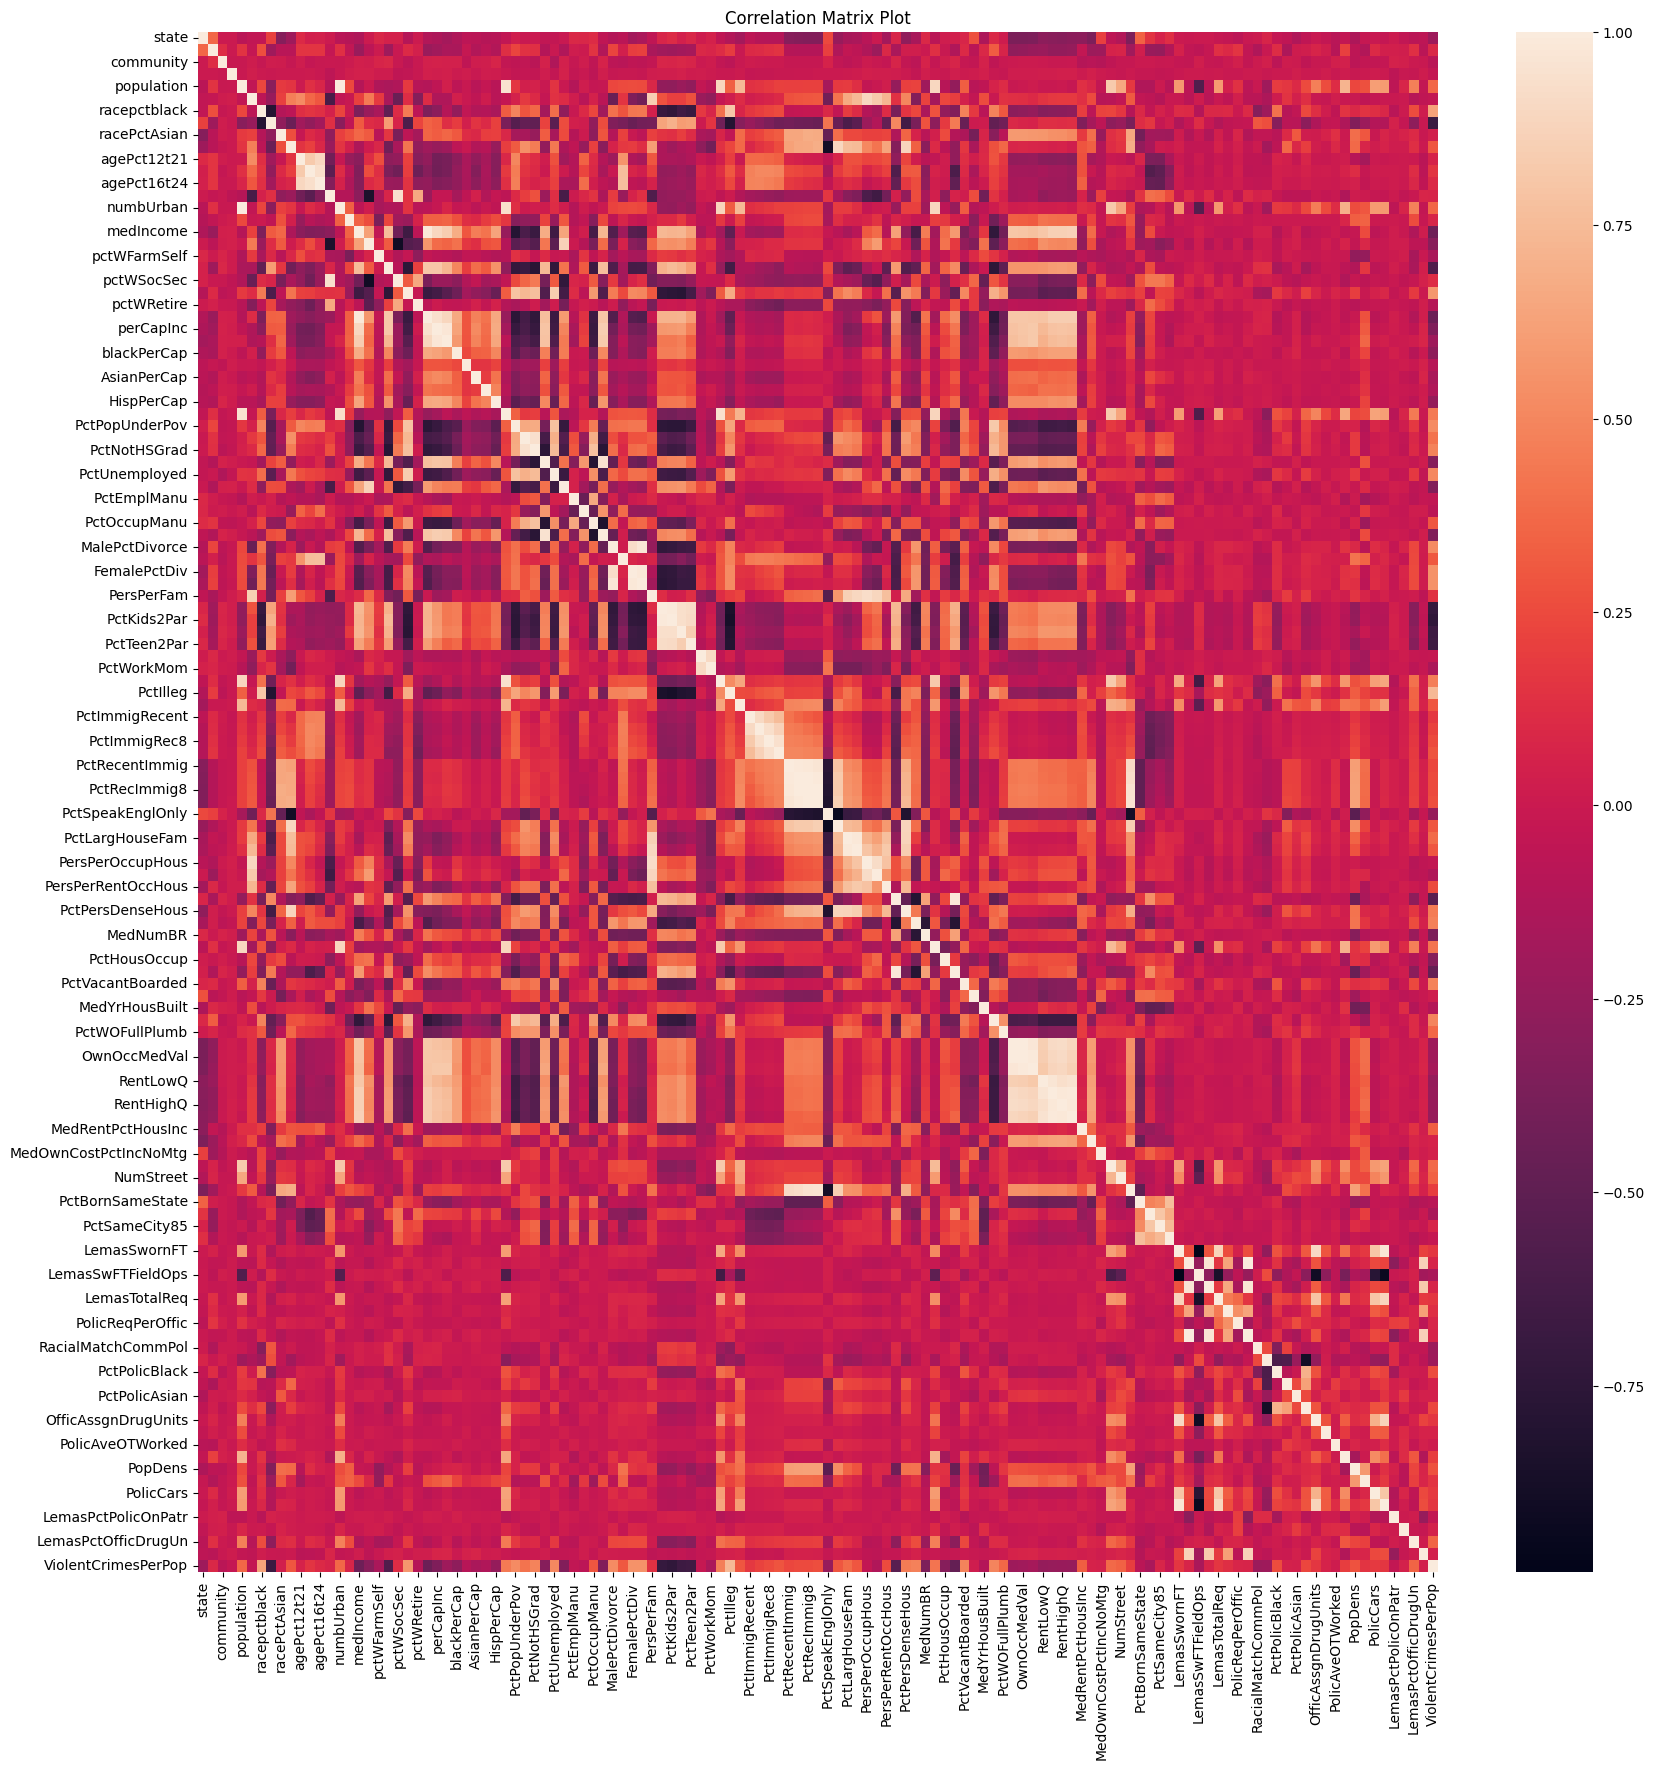

In [63]:
fig, axes = plt.subplots(figsize=(20, 20))
sns.heatmap(communities_data_table.corr(),ax=axes)
plt.title("Correlation Matrix Plot")
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [64]:
community_coeff_variation = np.array(community_predictive_table.describe().T['std'])/np.array(community_predictive_table.describe().T['mean'])
coeff_variation_table = pd.DataFrame(zip(community_predictive_columns, community_coeff_variation))
coeff_variation_table

,0,1
0,population,2.203503
1,householdsize,0.353298
2,racepctblack,1.410920
3,racePctWhite,0.323782
4,racePctAsian,1.359162
...,...,...
118,LemasPctPolicOnPatr,0.306251
119,LemasGangUnitDeploy,0.921372
120,LemasPctOfficDrugUn,2.555266
121,PolicBudgPerPop,0.844368


In [65]:
coeff_variation_table = coeff_variation_table.sort_values(by=1, ascending=False)
# Pick 11 best features
features_picked = coeff_variation_table.iloc[:int(np.sqrt(128)), 0]
features_picked

90               NumStreet
89           NumInShelters
49                NumIlleg
51                NumImmig
120    LemasPctOfficDrugUn
27             NumUnderPov
0               population
10               numbUrban
96            LemasSwornFT
108          PctPolicAsian
71              HousVacant
Name: 0, dtype: object

### (e) Scatter plots and box plots for highest CV features

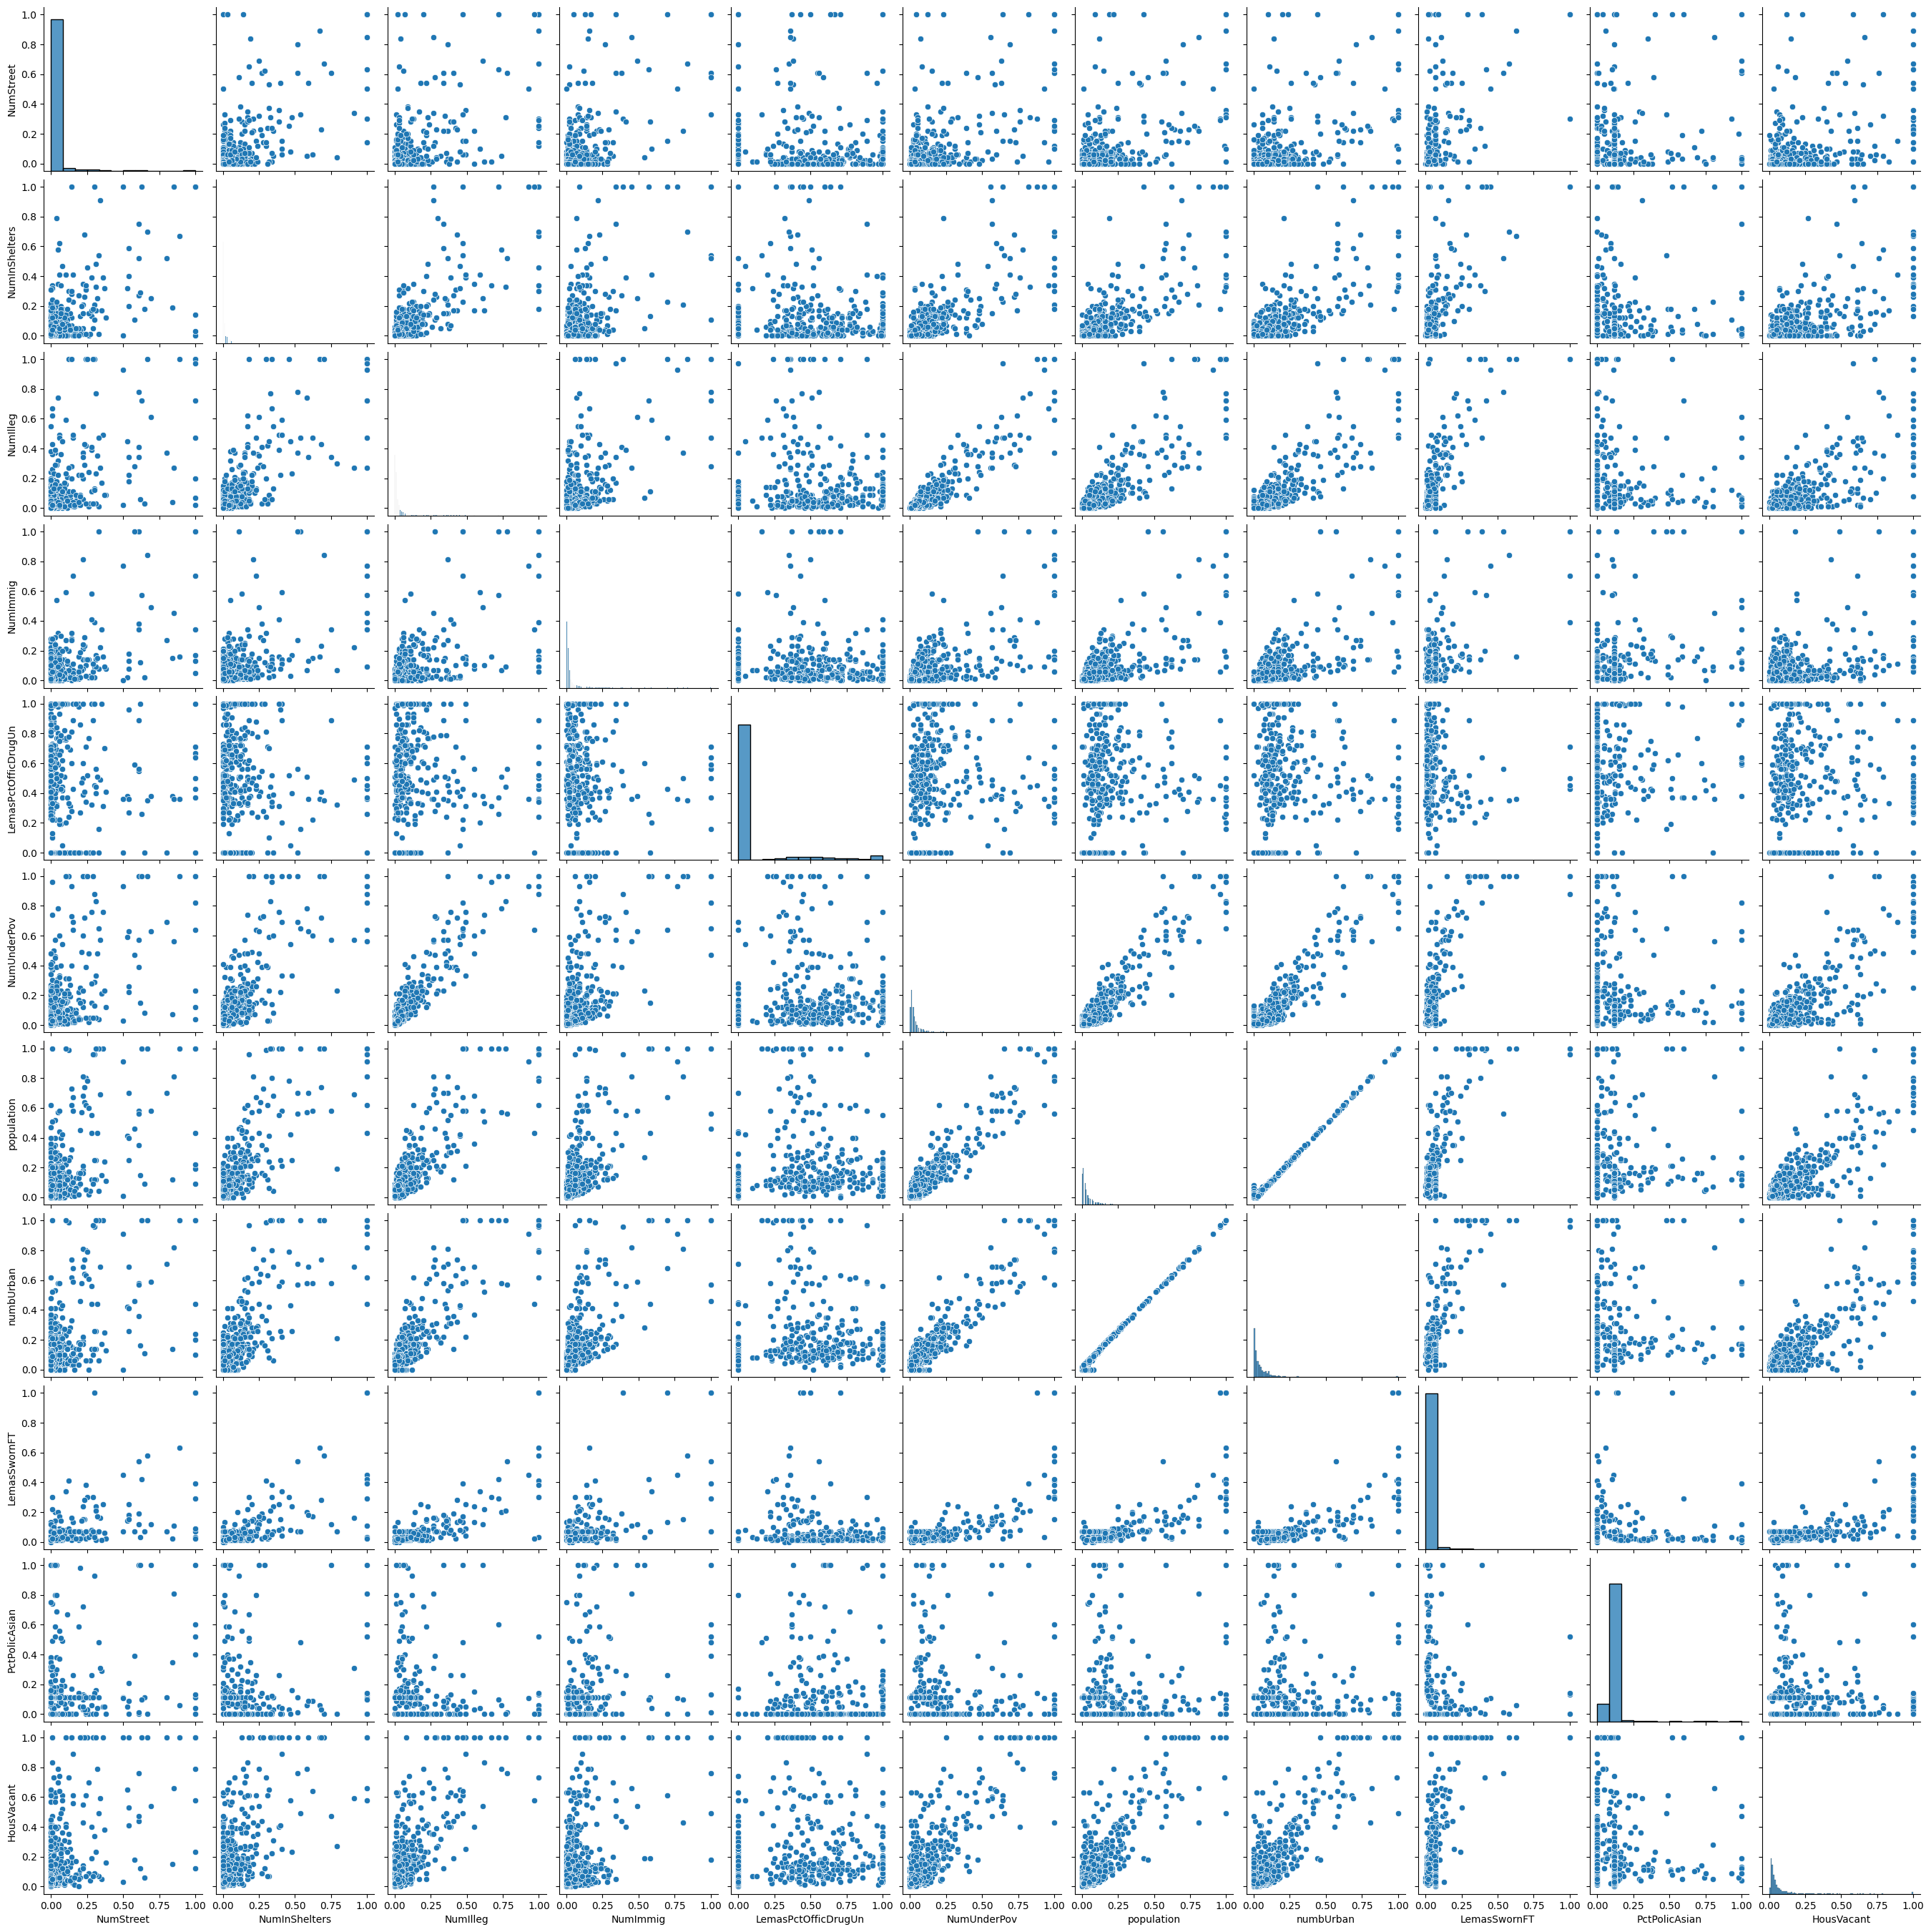

In [66]:
sns.pairplot(communities_data_table[features_picked])

<AxesSubplot: >

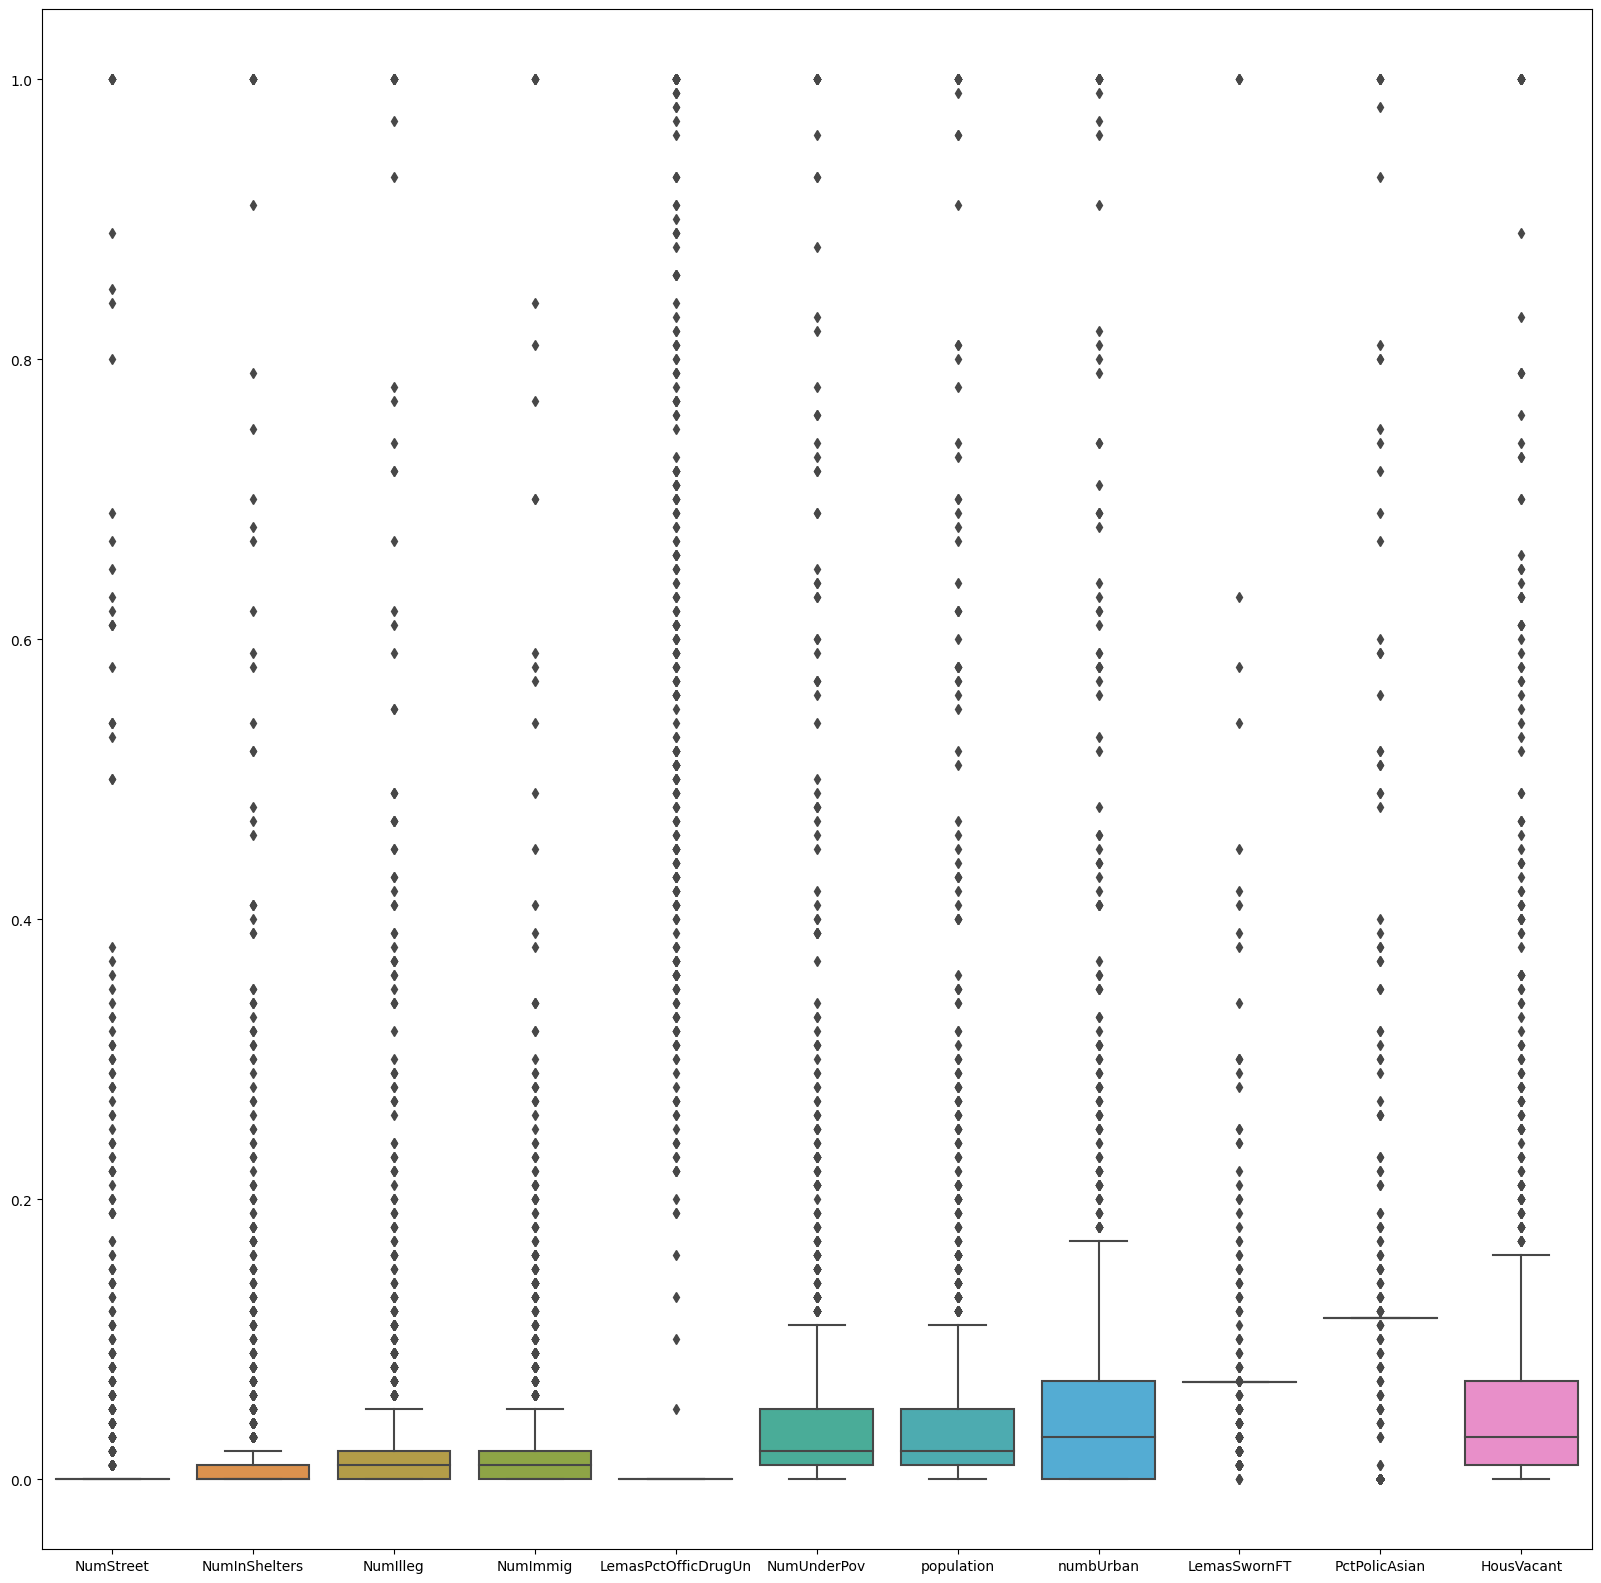

In [67]:
fig, axes = plt.subplots(figsize=(20, 20))
sns.boxplot(data=communities_data_table[features_picked], ax=axes)

#### Can you draw conclusions about significance of those features, just by the scatter plots?

It is difficult to draw any conclusions about the significance of the features based on just the scatter plots.


### (f) Fit a linear model

In [68]:
X_train, y_train, X_test, y_test = communities_train.iloc[:, :-1], communities_train.iloc[:, -1], communities_test.iloc[:, :-1], communities_test.iloc[:, -1]

In [69]:
communities_linear_model = LinearRegression().fit(X_train, y_train)
communities_linear_yhat = communities_linear_model.predict(X_test)
communities_linear_mse = mean_squared_error(y_test, communities_linear_yhat)
print('Linear model MSE = {}'.format(communities_linear_mse))

Linear model MSE = 0.7897255274193568


### (g) Fit a ridge regression model

In [70]:
lambda_values = [10**e for e in range(-6, 6)]

splitter = KFold(n_splits=5, shuffle=True, random_state=98)
ridge_regression_model = RidgeCV(alphas=lambda_values, cv=splitter).fit(X_train, y_train)

ridge_regression_yhat = ridge_regression_model.predict(X_test)
ridge_regression_mse = mean_squared_error(y_test, ridge_regression_yhat)

print('For Ridge Regression the best Lambda is {} and the MSE  is {}'.format(ridge_regression_model.alpha_, ridge_regression_mse))

For Ridge Regression the best Lambda is 1.0 and the MSE  is 0.01773708110430368


### (h) Fit a LASSO model

#### Non-Standarized

In [71]:
lasso_nonstandarized_model = LassoCV(alphas=lambda_values, cv=splitter, max_iter=200).fit(X_train, y_train)
lasso_nonstandarized_yhat = lasso_nonstandarized_model.predict(X_test)
lasso_nonstandarized_mse = mean_squared_error(y_test, lasso_nonstandarized_yhat)
print('For Lasso, with Non-Standarized X, the best Lambda is {}, with MSE {}'.format(lasso_nonstandarized_model.alpha_, lasso_nonstandarized_mse))

For Lasso, with Non-Standarized X, the best Lambda is 0.0001, with MSE 0.017784504137058562


In [72]:
lasso_nonstandarized_significant_coefs = lasso_nonstandarized_model.coef_[lasso_nonstandarized_model.coef_ != 0]
lasso_nonstandarized_table = pd.DataFrame(data=lasso_nonstandarized_significant_coefs, 
            columns=['Lasso, Non Standarized, Model Coefficients'], 
            index=X_train.columns[lasso_nonstandarized_model.coef_ != 0])

In [73]:
lasso_nonstandarized_table

,"Lasso, Non Standarized, Model Coefficients"
racepctblack,0.272024
racePctAsian,-0.017706
agePct12t21,0.076153
agePct12t29,-0.293351
agePct65up,0.000343
...,...
PctUsePubTrans,-0.047576
PolicCars,0.000772
LemasPctPolicOnPatr,0.024482
LemasGangUnitDeploy,0.041121


#### Standarized

In [74]:
X_train_standarized = StandardScaler().fit_transform(X_train)
X_test_standarized = StandardScaler().fit_transform(X_test)

lasso_standarized_model = LassoCV(alphas=lambda_values, cv=splitter, max_iter=150).fit(X_train_standarized, y_train)
lasso_standarized_yhat = lasso_standarized_model.predict(X_test_standarized)
lasso_standarized_mse = mean_squared_error(y_test, lasso_standarized_yhat)
print('For Lasso, with Standarized X, the best Lambda is {} and MSE is {}'.format(lasso_standarized_model.alpha_,lasso_standarized_mse))

For Lasso, with Standarized X, the best Lambda is 0.001 and MSE is 0.017952346923213548


In [75]:
lasso_standarized_significant_coefs = lasso_standarized_model.coef_[lasso_standarized_model.coef_ != 0]
lasso_standarized_table = pd.DataFrame(data=lasso_standarized_significant_coefs, 
            columns=['Lasso, Standarized, Model Coefficients'], 
            index= X_train.columns[lasso_standarized_model.coef_ != 0])

In [76]:
lasso_standarized_table

,"Lasso, Standarized, Model Coefficients"
racepctblack,0.066703
agePct12t21,0.005124
agePct12t29,-0.028463
pctUrban,0.015697
pctWWage,-0.008892
...,...
PopDens,0.002528
PctUsePubTrans,-0.007033
PolicCars,0.002421
LemasPctPolicOnPatr,0.002293


From the aforementioned results, we can see that the non-standarized values have a lower MSE score than standarized values, therefore making the non-standarized method better.

### (i) Fit a PCR model

In [77]:
pca_cv_scores = []
for i in range(1, len(X_train.columns)+1):
    pca_X_reduced = PCA(n_components=i).fit_transform(X_train)
    pca_cv_score = np.abs(cross_val_score(LinearRegression(), pca_X_reduced, y_train, cv=splitter, scoring='neg_mean_squared_error').mean())
    pca_cv_scores.append(pca_cv_score)

print('For PCR, the lowest MSE is {}, when Number of Components is {}'.format(np.min(pca_cv_scores), np.argmin(pca_cv_scores)+1))

For PCR, the lowest MSE is 0.019490975390302926, when Number of Components is 86


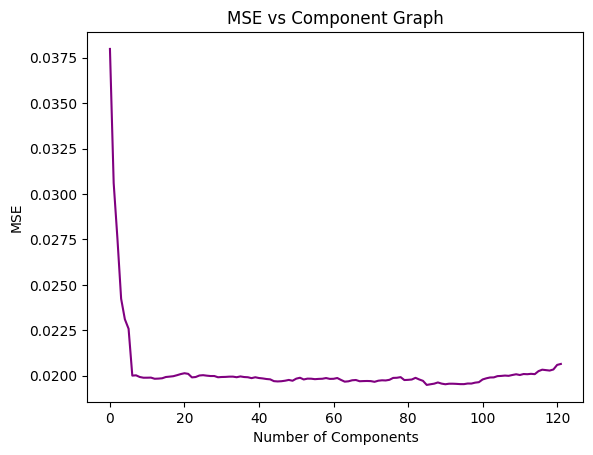

In [78]:
plt.plot(pca_cv_scores, color='purple')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.title('MSE vs Component Graph')
plt.show()

In [79]:
pca_X_train = PCA(n_components=86).fit_transform(X_train)
pca_X_test = PCA(n_components=86).fit_transform(X_test)

pcr_model = LinearRegression().fit(pca_X_train, y_train)

pcr_yhat = pcr_model.predict(pca_X_test)
pcr_mse_score = mean_squared_error(y_test, pcr_yhat)
print('For PCR, when number of components is 86, the MSE is {}'.format(pcr_mse_score))

For PCR, when number of components is 86, the MSE is 0.028606873491873703


### (j) Fit a boosting tree

In [80]:
boosting_mse_scores = []
# Drop the crazy high values for lambda as they are no good enough 
lambda_values = [10**e for e in range(-5,3)]
for i in lambda_values:
    boosting_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=i)
    boosting_score = np.abs(cross_val_score(boosting_model, X_train, y_train, cv=splitter, scoring='neg_mean_squared_error').mean())
    boosting_mse_scores.append(boosting_score)

print('For Boosting Tree, the best Lambda is {}, and MSE is {}'.format(lambda_values[np.argmin(boosting_mse_scores)], np.min(boosting_mse_scores)))

For Boosting Tree, the best Lambda is 10, and MSE is 0.02232955138250481


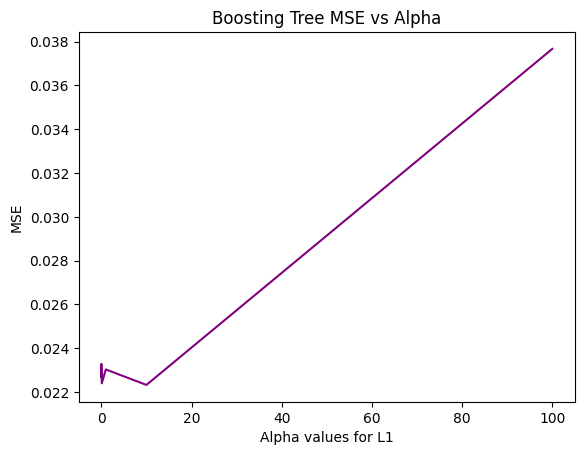

In [81]:
plt.plot(lambda_values, boosting_mse_scores, color='purple')
plt.xlabel('Alpha values for L1')
plt.ylabel('MSE')
plt.title('Boosting Tree MSE vs Alpha')
plt.show()

In [82]:
boosting_tree_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=10).fit(X_train, y_train)
boosting_tree_yhat = boosting_tree_model.predict(X_test)
boosting_tree_mse = mean_squared_error(y_test, boosting_tree_yhat)
print('For Boosting, when number of Lambda is 10, the MSE is {}'.format(boosting_tree_mse))

For Boosting, when number of Lambda is 10, the MSE is 0.018407136099108733


### Overall MSE's

In [83]:
overall_mse = [communities_linear_mse, ridge_regression_mse, lasso_nonstandarized_mse, lasso_standarized_mse,  pcr_mse_score, boosting_tree_mse]
models = ['Linear','Ridge Regression', 'Lasso Non-Standarized', 'Lasso Standarized', 'PCR Model', 'Boosting Tree']
pd.DataFrame(data= {'Models':models, 'MSE':overall_mse})

,Models,MSE
0,Linear,0.789726
1,Ridge Regression,0.017737
2,Lasso Non-Standarized,0.017785
3,Lasso Standarized,0.017952
4,PCR Model,0.028607
5,Boosting Tree,0.018407


# References

https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html.

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

https://xgboost.readthedocs.io/en/stable/install.html
